#**Problem Statement**

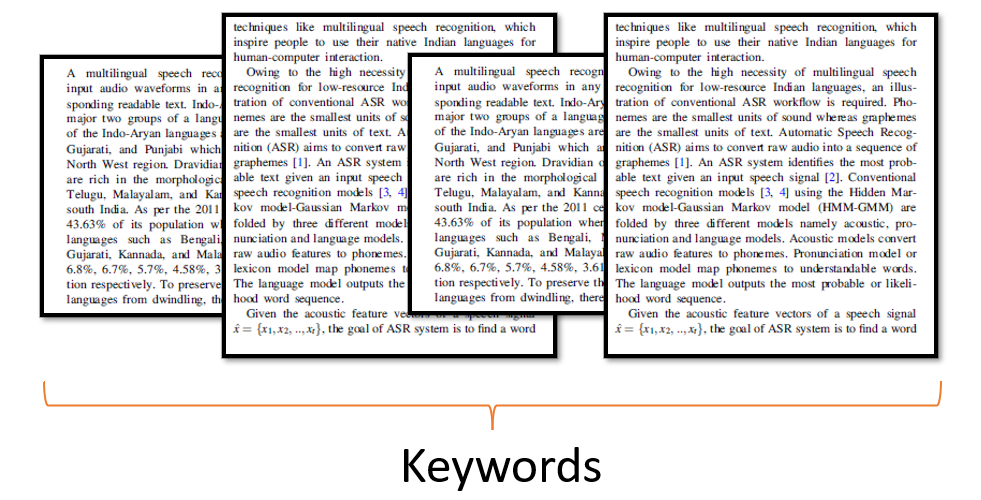

**The map_reduce framework**

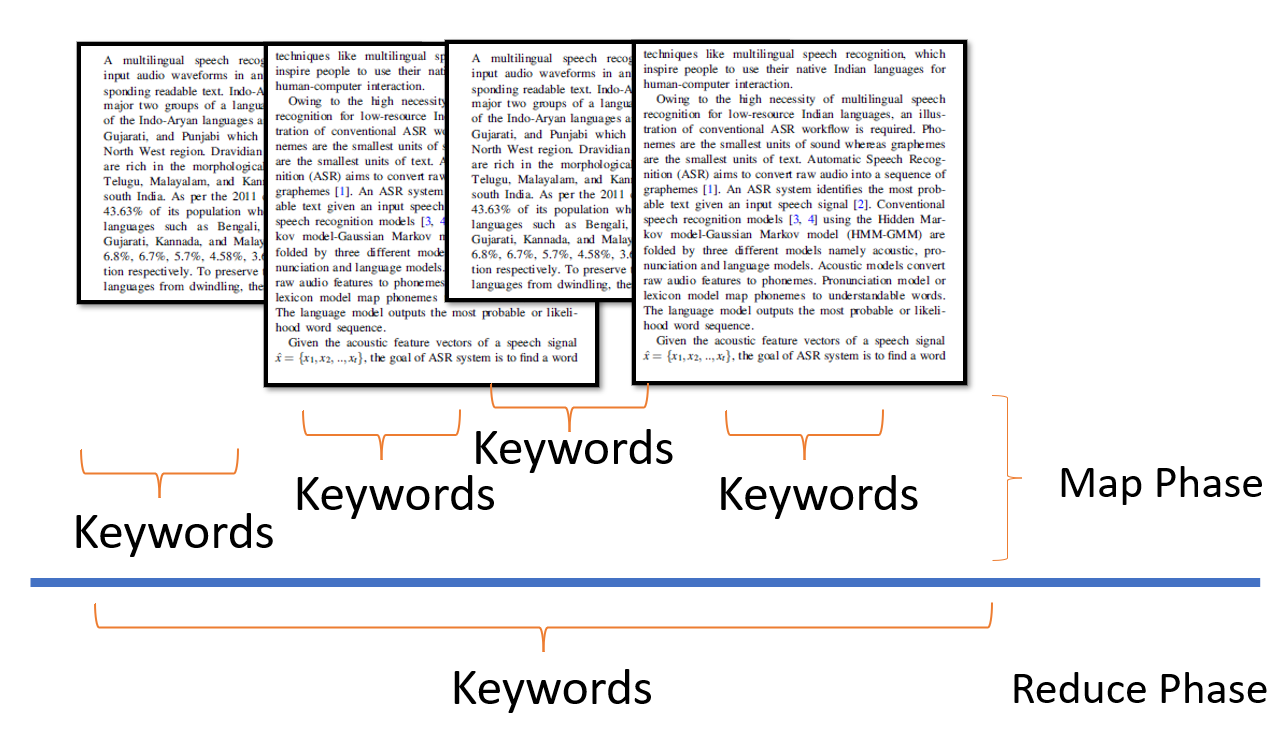

In [1]:
!pip install langchain openai pypdf tiktoken

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.5/75.5 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 272.3/272.3 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 6.7 MB/s eta 0:00:00


In [2]:
import openai

openai.api_key = your_key

In [3]:
from langchain.chat_models import ChatOpenAI

llm=ChatOpenAI(temperature=0, model="gpt-3.5-turbo-0613",openai_api_key = openai.api_key)

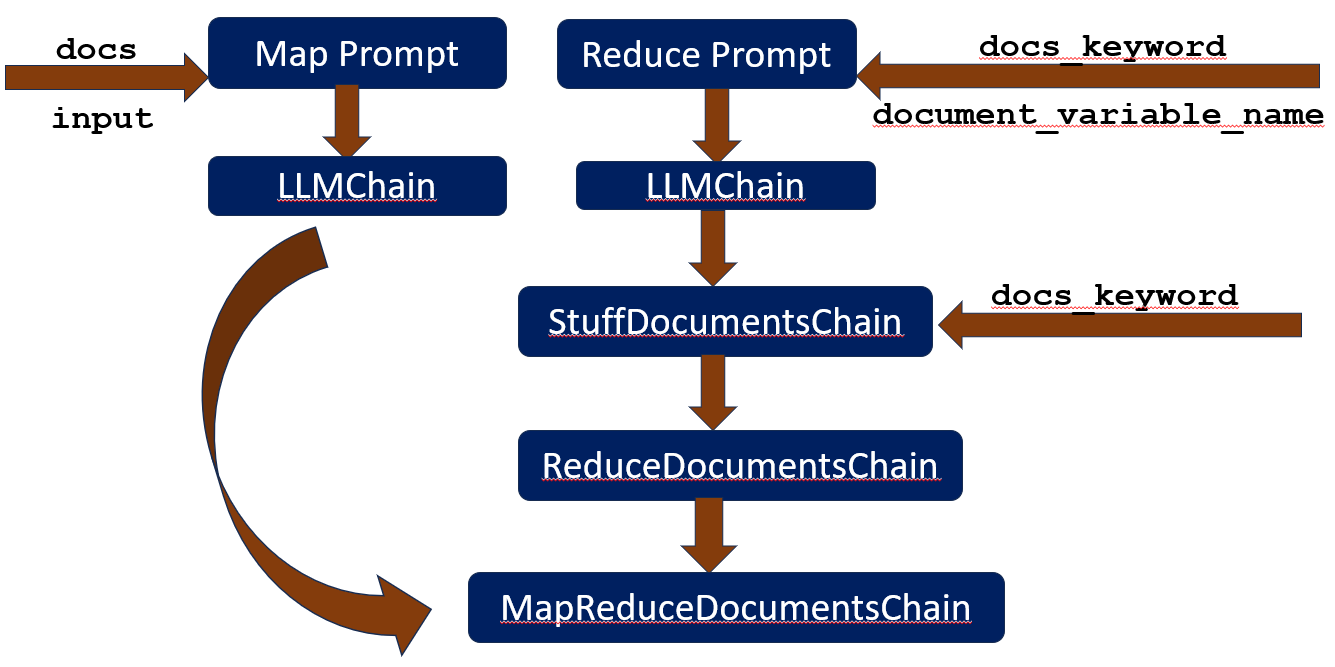

In [4]:
from langchain.prompts import PromptTemplate
from langchain.chains import LLMChain

# Map Prompt
# What should be done. Eg. Find technical words, summarise etc
map_template = """List all the technical words in the text provided.
Do not add any other information
{docs}"
"""

# from_template creates instance of PromptTemplate
# Pass template string
map_prompt = PromptTemplate.from_template(map_template)

# Sequential Chain
map_chain = LLMChain(llm=llm, prompt=map_prompt)

In [5]:
from langchain.chains import StuffDocumentsChain, ReduceDocumentsChain, MapReduceDocumentsChain

# Reduce Prompt
# Pass the words picked from each document in map phase and make a single list
# The word "distill" informs to keep only the most required
reduce_template = """The following is a list of technical words:
{doc_keywords}
Take these and distill it into a final, consolidated list of technical words in alphabetical order.
"""

reduce_prompt = PromptTemplate.from_template(reduce_template)
reduce_chain = LLMChain(llm=llm, prompt=reduce_prompt)

# Takes a list of documents, combines them into a single string, and passes this to an LLMChain
# Pass Variable name in the LLM chain to put the documents in
# Combines documents by stuffing into context.
combine_documents_chain = StuffDocumentsChain(
    llm_chain=reduce_chain,
    document_variable_name="doc_keywords"
)

# Combines and iteratively reduces the mapped documents
reduce_documents_chain = ReduceDocumentsChain(
    # Output of this chain is final result
    combine_documents_chain=combine_documents_chain,
    # If documents exceed context for `StuffDocumentsChain`
    collapse_documents_chain=combine_documents_chain,
    # The maximum number of tokens to group documents into.
    token_max=4000,
)

In [6]:
# Combining documents by mapping a chain over them, then combining results
map_reduce_chain = MapReduceDocumentsChain(
    # Map chain
    llm_chain=map_chain,
    # Reduce chain
    reduce_documents_chain=reduce_documents_chain,
    # The variable name in the llm_chain to put the documents in
    document_variable_name="docs",
    # Return the results of the map steps in the output
    return_intermediate_steps=False,
)


In [8]:
from langchain.document_loaders import PyPDFLoader

loader = PyPDFLoader("test.pdf")
data = loader.load()

print(len(data))
print(len(data[100].page_content))

148
2305


In [9]:
print(data[100].page_content)
text = data[100].page_content

Socialization and  Social  Control  Module  97  
 under the direct control of the government who take care of his/her population  
and trying  to provide  basic  essentials  with security.  
In modern  times,  there  are different  types  of government  with varied  
philosophies like democracy, communism, dictatorship and others. In modern  
societies  government  make  rules  and regulation  which  implemented  and 
guarded  with the help of given  constitution  of a particular  country  or state.  
12. Culture: Culture is a very extensive term; it simply defined as the manmade  
part of our surroundings. It helps to influencing the nature and social behaviour  
of an individual  in present  society.  
3.2.3.  Conformity  
 
Introduction  
Conformity  studies  stresses  on persons  to conform  the prospects  of a group,  
association, institute, society or leader. It is a category of social effect comprising a  
variation in trust or actions in command to fitting in group. It may inc

In [10]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(chunk_size = 1000, chunk_overlap = 0)
#docs = text_splitter.split_documents(data)

In [11]:
# For checking
# Create Document objects for each text chunk
from langchain.docstore.document import Document

texts = text_splitter.split_text( data[100].page_content)
docs = [Document(page_content=t) for t in texts[:]]

In [12]:
print(len(docs))

3


In [14]:
print(map_reduce_chain.run(docs))

- Actions
- Association
- Attitude
- Behaviour
- Beliefs
- Category
- Change
- Command
- Compliance
- Conformity
- Constitution
- Culture
- Democracy
- Dictatorship
- Essentials
- Government
- Group
- Influence
- Institute
- Individual
- Leader
- Nature
- Philosophies
- Population
- Regulation
- Rules
- Security
- Social behavior
- Social control
- Social effect
- Society
- Studies
- Surroundings
- Types
